In [ ]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_mask = '/content/drive/MyDrive/MINI/mask'
folder_image = '/content/drive/MyDrive/MINI/image'

In [ ]:
train_images = []

for directory_path in os.listdir(folder_image):
        img = Image.open(folder_image+'/'+directory_path)
        img = np.array(img)
        train_images.append(img)

train_images = np.array(train_images)
train_images = train_images/255.0

#Capture mask/label info as a list
train_masks = []
for directory_path in os.listdir(folder_mask):
        mask = Image.open(folder_mask+'/'+directory_path)
        mask = np.array(mask)
        train_masks.append(mask)

#Convert list to array for machine learning processing
train_masks = np.array(train_masks)
train_masks = train_masks/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
inputs = tf.keras.Input((128, 128, 3))

    # Contracting Path
s = inputs

    #Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

#Expansive path

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = Conv2D(3, (1, 1), activation='softmax')(c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 18s 2s/step - loss: 0.1260 - accuracy: 0.9420 - val_loss: 0.1252 - val_accuracy: 0.9960
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 0.1254 - accuracy: 0.9830 - val_loss: 0.1250 - val_accuracy: 0.9872
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.1251 - accuracy: 0.9628 - val_loss: 0.1248 - val_accuracy: 0.9792
Epoch 4/10
6/6 [==============================] - 15s 3s/step - loss: 0.1248 - accuracy: 0.9228 - val_loss: 0.1244 - val_accuracy: 0.9537
Epoch 5/10
6/6 [==============================] - 15s 2s/step - loss: 0.1251 - accuracy: 0.8350 - val_loss: 0.1250 - val_accuracy: 0.9050
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.1244 - accuracy: 0.9024 - val_loss: 0.1244 - val_accuracy: 0.9328
Epoch 7/10
6/6 [==============================] - 12s 2s/step - loss: 0.1243 - accuracy: 0.8810 - val_loss: 0.1245 - val_accuracy: 0.8929
Epoch 8/10
6/6 [==================

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
from PIL import Image, ImageEnhance

In [ ]:
positive = '/content/drive/MyDrive/MINI/positive_test'
destination_directory_pos = '/content/drive/MyDrive/MINI/train_positive'
negative = '/content/drive/MyDrive/MINI/negative_test'
destination_directory_neg = '/content/drive/MyDrive/MINI/train_negative'
pos = []
neg = []
for i in os.listdir(positive):
    img = Image.open(positive+'/'+i)
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(0.7)
    pos.append(img_brightened)

for i in os.listdir(negative):
    img = Image.open(negative+'/'+i)
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(0.7)
    neg.append(img_brightened)

for i in range(len(pos)):
    destination_path_pos = os.path.join(destination_directory_pos, str(i)+".png")
    pos[i].save(destination_path_pos)
for i in range(len(neg)):
    destination_path_neg = os.path.join(destination_directory_neg, str(i)+".png")
    neg[i].save(destination_path_neg)

In [ ]:
positive = '/content/drive/MyDrive/MINI/train_positive'
destination_directory_pos = '/content/drive/MyDrive/MINI/positive_1'
max_images = 76  # Maximum number of images to process
image_count = 0  # Counter for processed images

for i in os.listdir(positive):
    if image_count >= max_images:
        break  # Exit the loop if the maximum number of images has been processed

    input_image = Image.open(os.path.join(positive, i))
    input_image = np.array(input_image)
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)
    predictions = model.predict(input_image)
    predictions = predictions * 255.0
    predictions = predictions.astype(np.uint8)
    predicted_image = Image.fromarray(predictions[0])
    destination_path_pos = os.path.join(destination_directory_pos, str(i))
    predicted_image.save(destination_path_pos)

    image_count += 1  # Increment the image counter

1/1 [==============================] - 0s 50ms/step


In [ ]:
negative = '/content/drive/MyDrive/MINI/train_negative'
destination_directory_neg = '/content/drive/MyDrive/MINI/negative_1'
for i in os.listdir(negative):
    input_image = Image.open(negative+'/'+i)
    input_image = np.array(input_image)
    input_image = input_image/255.0
    input_image = np.expand_dims(input_image, axis=0)
    predictions = model.predict(input_image)
    predictions = predictions * 255.0
    predictions = predictions.astype(np.uint8)
    predicted_image = Image.fromarray(predictions[0])
    destination_path_neg = os.path.join(destination_directory_neg, str(i))
    predicted_image.save(destination_path_neg)

1/1 [==============================] - 0s 97ms/step


In [ ]:
input_image = Image.open('/content/drive/MyDrive/MINI/image/image_44.png')
input_image = np.array(input_image)
input_image = input_image/255.0
input_image = np.expand_dims(input_image, axis=0)
predictions = model.predict(input_image)
predictions = predictions * 255.0
predictions = predictions.astype(np.uint8)
predicted_image = Image.fromarray(predictions[0])
predicted_image.show()

1/1 [==============================] - 0s 161ms/step


TypeError: Invalid shape (1, 128, 128, 3) for image data

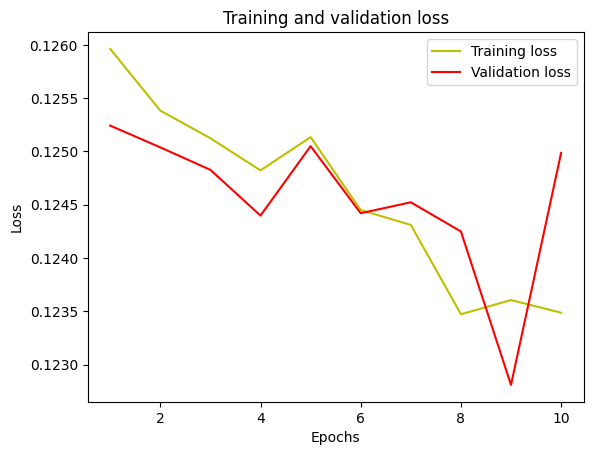

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


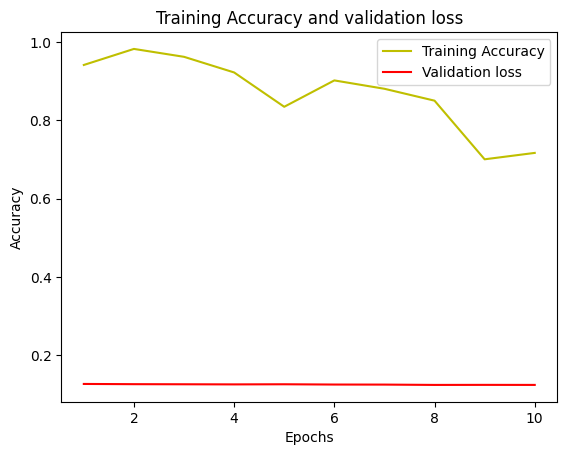

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label='Validation loss')
plt.title('Training Accuracy and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()